# EDA

## Análisis exploratorio

En esta sección se organizara y preparará los datos, para identificar fallos en la recogida, diseño evaluar, datos ausentes, identificar casos atípicos.

Algunas preguntas para iniciar:

¿Hay sesgos en los datos?

¿Existen errores en la codificación de los datos?

¿Cómo se presentan los datos y cuál es la mejor forma de visualizarlos?

¿Exisisten datos atípicos(outliers)?¿Cuáles son? ¿Cómo tratarlos?

¿Hay datos faltantes(missing) y cómo se deberían tratar?

In [1]:
import pandas as pd
data_arg=pd.read_csv('../data/---datos limpios/df_propiedades.csv')

RECORDAMOS: El objetivo es crear un modelo de machine learning que prediga precios de propiedades en Argentina, solo el tipo de operación venta y en dolares. 

In [2]:
data_arg.sample(5)

,localidad,id,ad_type,start_date,end_date,created_on,lat,lon,país,provincia,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
14167,Ituzaingó,24PWm710JYeEyjkdOdEXgA==,Propiedad,2020-07-16,2020-09-23,2020-07-16,-34.643150,-58.665989,Argentina,Bs.As. G.B.A. Zona Oeste,...,2.0,152.0,102.0,130000.0,USD,NaN,Cnel M Chilavert 500 - U$D 130.000 - Casa en ...,En venta.Casa en PH en dos plantas. Muy buen e...,Casa,Venta
527236,Costa Esmeralda,X8ucl8XVyw+jxAeUNU/F+w==,Propiedad,2020-09-24,9999-12-31,2020-09-24,-37.019471,-56.803524,Argentina,Buenos Aires Costa Atlántica,...,0.0,1130.0,412.0,64000.0,USD,Mensual,"Lote Nª 159 de Golf I, en el barrio Costa Esme...","En barrio Golf I, en zona consolidada con el G...",Lote,Venta
43547,Rosario,5G/aL+Ef47oKgz2pSbYvHA==,Propiedad,2020-06-03,2021-04-09,2020-06-03,-32.998375,-60.634247,Argentina,Santa Fe,...,1.0,650.0,248.0,168000.0,USD,NaN,Regimiento 11 200 - U$D 168.000 - Casa en Venta,Excelente y amplia casa de 2 dormitorios a mts...,Casa,Venta
536260,Escobar,AUVAP3/Vs/ifs7uW7VjElg==,Propiedad,2020-11-10,2021-04-10,2020-11-10,-34.343601,-58.790451,Argentina,Bs.As. G.B.A. Zona Norte,...,0.0,816.0,412.0,39000.0,USD,Mensual,BARRIO CERRADO EL NAUDIR OPORTUNIDAD LOTE,"Barrio cerrado El Naudir, excelente lote a la ...",Lote,Venta
351782,San Isidro,eZ0DWhPVKAOAmU+y2WpooQ==,Propiedad,2020-11-08,2021-03-27,2020-11-08,-34.470532,-58.510162,Argentina,Bs.As. G.B.A. Zona Norte,...,1.0,60.0,54.0,298000.0,USD,NaN,San Isidro - Departamento Venta USD 298.000,"San Isidro, muy buen departamento en excelente...",Departamento,Venta


In [3]:
data_arg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609185 entries, 0 to 609184
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   localidad        609185 non-null  object 
 1   id               609185 non-null  object 
 2   ad_type          609185 non-null  object 
 3   start_date       609185 non-null  object 
 4   end_date         609185 non-null  object 
 5   created_on       609185 non-null  object 
 6   lat              609185 non-null  float64
 7   lon              609185 non-null  float64
 8   país             609185 non-null  object 
 9   provincia        609185 non-null  object 
 10  rooms            609185 non-null  float64
 11  bedrooms         609185 non-null  float64
 12  bathrooms        609185 non-null  float64
 13  surface_total    609185 non-null  float64
 14  surface_covered  609185 non-null  float64
 15  price            609185 non-null  float64
 16  currency         609185 non-null  obje

¿Qué variables tenemos?

In [4]:
print(data_arg.columns)

Index(['localidad', 'id', 'ad_type', 'start_date', 'end_date', 'created_on',
       'lat', 'lon', 'país', 'provincia', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'price', 'currency', 'price_period',
       'title', 'description', 'property_type', 'operation_type'],
      dtype='object')


¿Estas variables influyen o impactan en el precio de las propiedades(variable dependiente)?

Los posibles features:


* localidad
* provincia
* lat y lon
* rooms
* bedrooms
* bathrooms
* surface_total
* surface_covered
* property_type                  

Descartadas:
* currency: es el tipo de moneda, que ya lo filtre anteriormente solo propiedades en USD(dolares)
* operation_type: porque solo me interesan las propiedad de venta y anteriormente se filtro por el tipo de operación venta.

¿Los datos estan en el tipo de dato correcto?

In [5]:
data_arg.dtypes

localidad           object
id                  object
ad_type             object
start_date          object
end_date            object
created_on          object
lat                float64
lon                float64
país                object
provincia           object
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
currency            object
price_period        object
title               object
description         object
property_type       object
operation_type      object
dtype: object

¿Esos posibles features tienen datos nulos?

In [6]:
data_arg.isnull().sum()

localidad               0
id                      0
ad_type                 0
start_date              0
end_date                0
created_on              0
lat                     0
lon                     0
país                    0
provincia               0
rooms                   0
bedrooms                0
bathrooms               0
surface_total           0
surface_covered         0
price                   0
currency                0
price_period       387123
title                   1
description            24
property_type           0
operation_type          0
dtype: int64

Insight las posibles features:

* No contienen datos nulos
* La mayoria de datos estan en float, excepto: provincia, localidad, tipo de propiedad, que estan en object

In [7]:
data_arg[["lat", "lon", "rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered"]].describe(percentiles=[i/10 for i in list(range(1, 10))+[0.01 ,0.99]]). round(1). T


,count,mean,std,min,0.1%,9.9%,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
lat,609185.0,-34.6,1.8,-54.8,-42.8,-37.1,-37.1,-34.8,-34.7,-34.6,-34.6,-34.6,-34.5,-34.4,-32.9,-22.0
lon,609185.0,-59.2,2.3,-72.9,-71.6,-60.9,-60.9,-58.9,-58.7,-58.6,-58.5,-58.4,-58.4,-58.4,-58.0,-53.7
rooms,609185.0,2.5,1.8,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,3.0,3.0,4.0,5.0,40.0
bedrooms,609185.0,1.7,1.9,-16.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,3.0,3.0,900.0
bathrooms,609185.0,1.4,1.1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,20.0
surface_total,609185.0,267.6,1325.1,10.0,12.0,48.0,48.0,60.0,60.0,70.0,100.0,200.0,240.0,297.0,649.0,100000.0
surface_covered,609185.0,1201.1,768980.2,1.0,2.0,42.0,42.0,54.0,54.0,62.0,84.0,150.0,171.0,230.0,412.0,600000000.0


Insight:

* Lat y lon tienen valores razonables para propiedades en Argentina.

* rooms: el maximo 40 --> parece outlier

* bedrooms: el min es -16 es un error, el max 900 tambien parece un error

* bathrooms: maximo 20 puede ser posible, pero poco común. Revisar si es outlier

* superficie total: 

 la mediana es 267 m2

el max 100.000 m2 probablemente sea un error

* superficie cubierta: 

la media: 1201 es raro, porque es más grande que la mediana de superficie total

el maximo: 600.000.000. Es un error 

In [8]:
#eliminar los valore negativos de bedrooms
data_arg = data_arg[data_arg['bedrooms']>= 0]

Resultado:
Definimos la variable target y separamos las variables categoricas de las numericas.

In [9]:
# Definir variable target
target = ["price"]

# Separar variables categóricas (tipo object, excluyendo el target)
categoricas = data_arg.drop(columns=target).select_dtypes(include="object").columns.tolist()

# Separar variables numéricas (tipo number)
numericas = data_arg.select_dtypes(include="number").columns.tolist()

## Análisis univariado

### Análisis target: price

¿Cómo esta distribuido el precio de las propiedades?

In [10]:
data_arg.price.describe().round(1)

count       609183.0
mean        223921.7
std         468028.4
min              0.0
25%          75000.0
50%         130000.0
75%         240000.0
max      111111111.0
Name: price, dtype: float64

Insight:

El precio promedio es 223.921, pero hay precios de propiedades que cuestan 0 y otras muchisimo más 111 millones, que son outiliers. Por lo que la desviación estándar es muy alta: 468.028, porque que nos dice que hay una gran diferencia de precios.

Se realiza un histograma y log-histograma para ver la distribución de precio. 

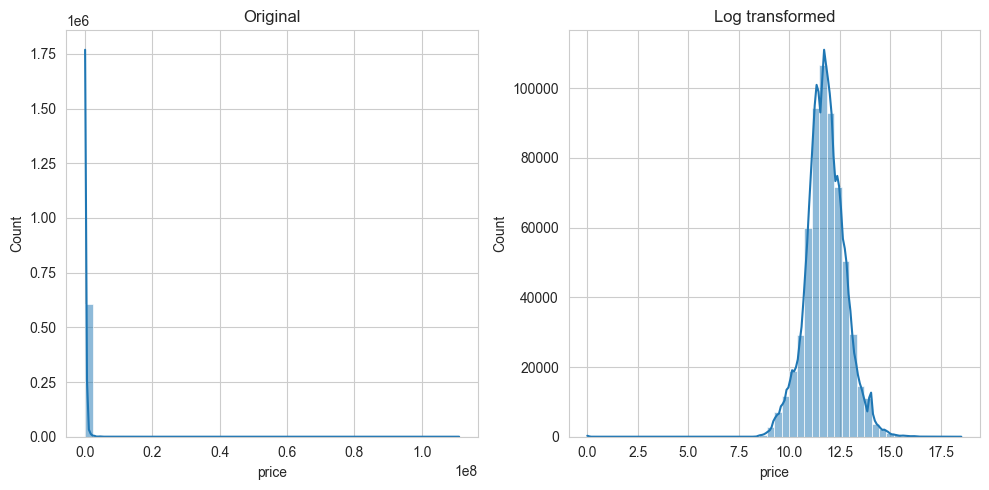

In [11]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

sns.set_style("whitegrid")

plt.figure(figsize=(10, 5))

# Histograma original
plt.subplot(1, 2, 1)
sns.histplot(data_arg['price'], bins=50, kde=True)
plt.title('Original')

# Histograma con log1p
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(data_arg['price']), bins=50, kde=True)
plt.title('Log transformed')

plt.tight_layout()

Insight distribución original:

* Hay un **sesgo positivo** porque hay una alta concentración de precios bajos, y valores extremadamente altos (outliers) que estiran la escala hacia la derecha.



¿Cómo tratar los outliers?

In [12]:
data_arg[data_arg['price'] == 0].shape

(129, 22)

In [13]:
#contar los valores extremos que tengo
data_arg[data_arg['price'] > 2_000_000].shape

(3347, 22)

Insight:

Valores extremos:

* Hay 3.347 propiedades con price > 2.000.000 (≈ 0.5% del dataset).

* Hay 129 propiedades con price = 0, que probablemente son errores o valores faltantes codificados como cero.

In [14]:
#se elimina las propiedades ==0 porque no son una propiedad real
data_arg = data_arg[data_arg['price'] > 0]


In [15]:
data_arg['price'].quantile(0.99)

np.float64(1500000.0)

In [16]:
data_arg['price'].quantile(0.995)

np.float64(2200000.0)

In [17]:
import numpy as np
#  Capear outliers al percentil 99.5
cap_value = data_arg['price'].quantile(0.995)
data_arg['price_capped'] = np.where(data_arg['price'] > cap_value, cap_value, data_arg['price'])

data_arg['log_price']= np.log(data_arg['price_capped'])

In [18]:
data_arg.log_price.describe().round(1)

count    609054.0
mean         11.8
std           1.0
min           0.0
25%          11.2
50%          11.8
75%          12.4
max          14.6
Name: log_price, dtype: float64

<Axes: xlabel='log_price', ylabel='Count'>

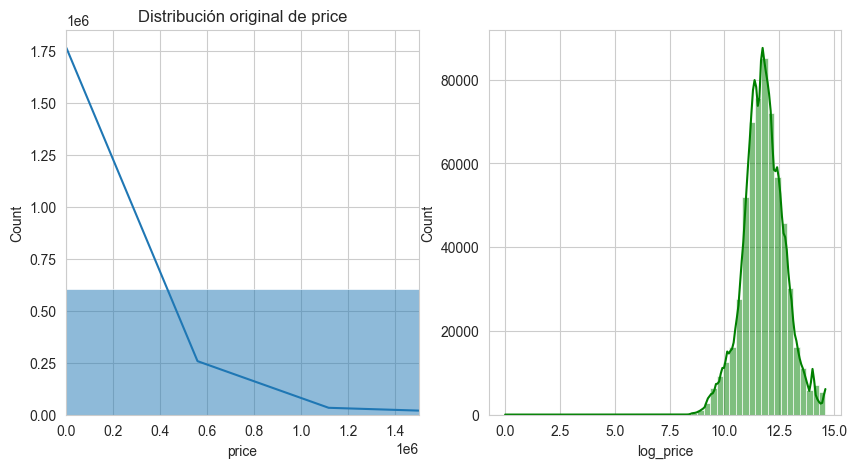

In [19]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

sns.set_style("whitegrid")

plt.figure(figsize=(10, 5))

# Histograma original
plt.subplot(1, 2, 1)
sns.histplot(data_arg['price'], bins=50, kde=True)
plt.title('Distribución original de price')
plt.xlabel('price')
plt.xlim(0, data_arg['price'].quantile(0.99))  # para evitar aplastamiento por outliers

# Histograma log-transformado
plt.subplot(1, 2, 2)
sns.histplot(data_arg['log_price'], bins=50, kde=True, color='green')


### Análisis features numericas: rooms,bedrooms, bathrooms

In [20]:
data_arg[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']].describe().round(1)


,rooms,bedrooms,bathrooms,surface_total,surface_covered
count,609054.0,609054.0,609054.0,609054.0,609054.0
mean,2.5,1.7,1.4,267.5,1201.3
std,1.8,1.9,1.1,1325.2,769062.9
min,0.0,0.0,0.0,10.0,1.0
25%,1.0,1.0,1.0,60.0,54.0
50%,2.0,1.0,1.0,100.0,84.0
75%,4.0,3.0,2.0,240.0,171.0
max,40.0,900.0,20.0,100000.0,600000000.0


Valores extremos:

*Rooms*
* Max -->40. Probablemente sea un outlier

*Bedrooms*
* Max -->900. Es un valor outlier

*Bathrooms*
* Max -->20. Es un valor inusual

*Surface_total*
* std: 1325.2 es muy alta con respecto al promedio que es 267.5. Lo que indica que hay propiedades extremadamente grandes en comparación con la media.

* Max:  100,000 m², lo que es una superficie extremadamente grande, y podría reflejar propiedades comerciales o grandes terrenos.

*Surface_covered*

* std: 769062.9 refleja una gran variabilidad con respecto a la media.

* Max: 600.000.000 es un valor extremadamente alto y probablemente sea un error en la carga de datos o propiedades expecionales(terrenos muy grandes)

#### Variables discretas

In [21]:
data_arg["bathrooms"].value_counts().sort_index()


bathrooms
0.0     101657
1.0     283929
2.0     141510
3.0      52301
4.0      20268
5.0       6067
6.0       2073
7.0        648
8.0        285
9.0         87
10.0       139
11.0        22
12.0        18
13.0         8
14.0         5
15.0        14
16.0         5
17.0         2
18.0         9
19.0         1
20.0         6
Name: count, dtype: int64

In [22]:
data_arg["bathrooms"] = data_arg["bathrooms"].astype("Int64")
data_arg["rooms"] = data_arg["rooms"].astype("Int64")
data_arg["bedrooms"] = data_arg["bedrooms"].astype("Int64")


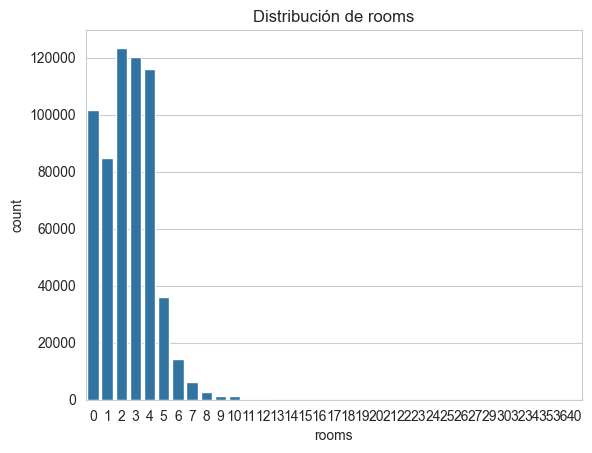

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot para valores enteros
sns.countplot(x=data_arg["rooms"])
plt.title("Distribución de rooms")
plt.show()

Insight:

Distribución sesgada a la izquierda(positiva), porque la mayoria de propiedades tiene entre 1 y 5 habitaciones. A partir de 6, la frecuencia cae.

Outliers a la derecha: como vimos en el discribe() y acá se confirma hay propiedades con hasta 40 habitaciones.

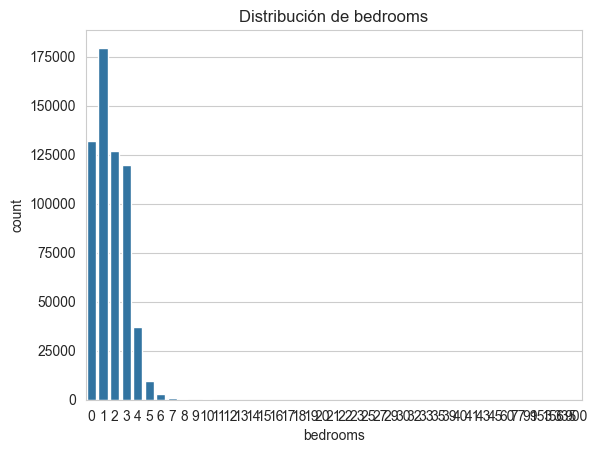

In [24]:
sns.countplot(x=data_arg["bedrooms"])
plt.title("Distribución de bedrooms")
plt.show()

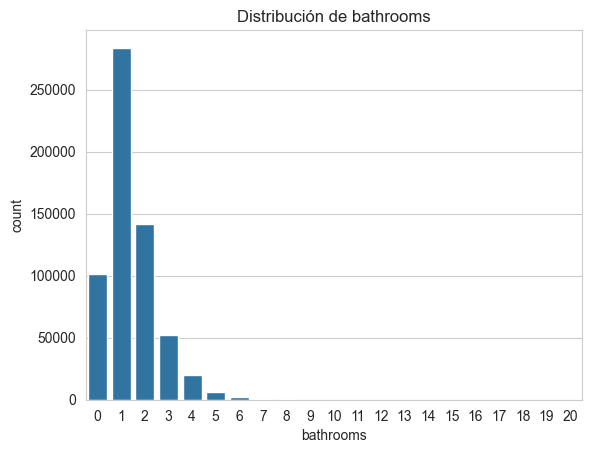

In [25]:
sns.countplot(x=data_arg["bathrooms"])
plt.title("Distribución de bathrooms")
plt.show()

Insight:

Distribución con sesgo positivo. Porque la mayoria de las propiedades tienen entre 1 y 2 baños. Pero encontramos en una 20 baños, lo cual es un outlier.

### Variables continuas

#### Surface_covered

In [30]:
data_arg.surface_covered.describe().round(1)

count       609054.0
mean          1201.3
std         769062.9
min              1.0
25%             54.0
50%             84.0
75%            171.0
max      600000000.0
Name: surface_covered, dtype: float64

Insight: Surface_covered tiene una distribución muy sesgada por que el valor max 600.000.000 que puede ser un outlier o error de carga.
Por lo tanto, para graficar vamos ajustar esos datos, optando por vidualizar solo hasta el percentil 99 para entender la distribución general.

In [31]:
data_arg['surface_covered'].describe(percentiles=[0.01] + [i/10 for i in range(1, 10)] + [0.99]).round(1)


count       609054.0
mean          1201.3
std         769062.9
min              1.0
1%              13.0
10%             42.0
20%             54.0
30%             54.0
40%             62.0
50%             84.0
60%            150.0
70%            171.0
80%            230.0
90%            412.0
99%            530.0
max      600000000.0
Name: surface_covered, dtype: float64

In [32]:
print(f"Cantidad de outliers por encima del P99: {(data_arg['surface_covered'] > data_arg['surface_covered'].quantile(0.99)).sum()}")


Cantidad de outliers por encima del P99: 6080


Insight:
* El percentil 99% indica que el 99% de las propiedades tienen una superficie cubierta menor o igual a 530 m².

* Tambien significa que solo el 1% de los datos está por encima de 530 m², que son 6080 propiedades. 

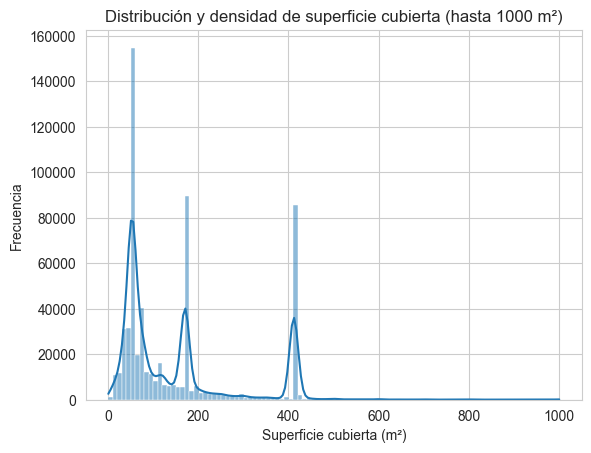

In [36]:
import seaborn as sns

sns.histplot(data_arg[data_arg['surface_covered'] <= 1000]['surface_covered'], kde=True, bins=100)
plt.title("Distribución y densidad de superficie cubierta (hasta 1000 m²)")
plt.xlabel("Superficie cubierta (m²)")
plt.ylabel("Frecuencia")
plt.show()


Insight:

1. Vemos una distribución multimodal 3 picos que sugiere que hay muchas propiedades en esas superficies. 

2. El primer pico (menor a 100 m²) es el más alto con diferencia, lo que indica que la mayoría de las propiedades en el dataset tienen superficies cubiertas relativamente pequeñas.

3. Hay un sesgo positivo por la cola larga de la derecha, significa que hay una cantidad menor de propiedades con superficie cubierta alta. ¿Qué podemos hacer con esas propiedades?

4. La curva azul suave (KDE) sigue bien la forma general de los histogramas, indicando que los picos no son ruidos aleatorios, sino tendencias reales en los datos.

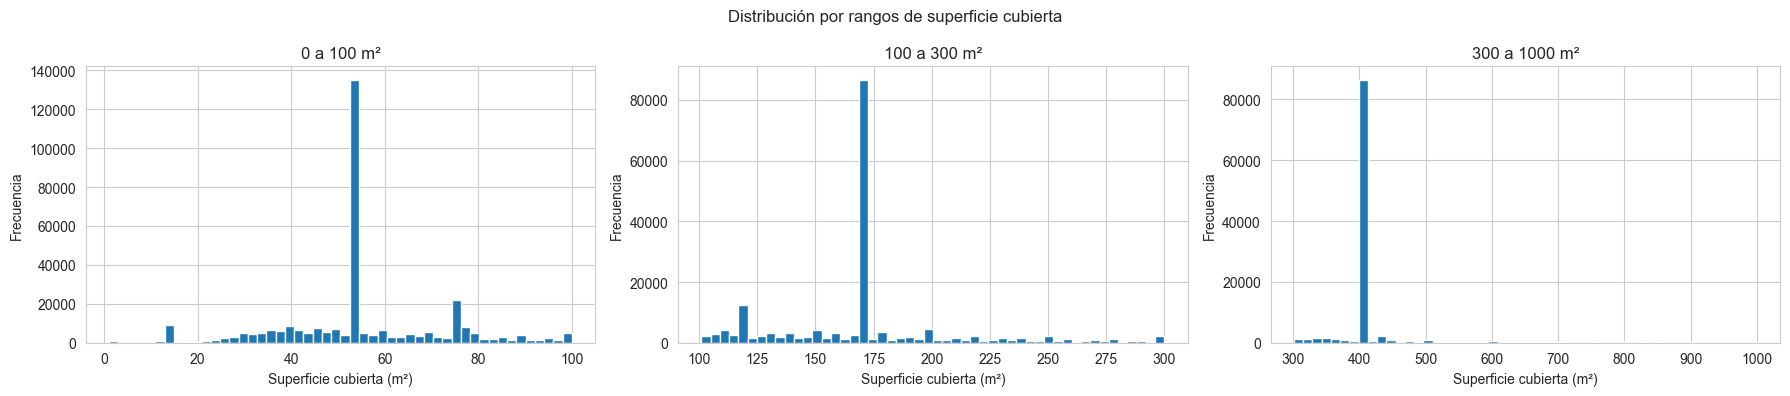

In [40]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 4))

# Rango 0-100 m²
data_arg[data_arg['surface_covered'] <= 100]['surface_covered'].hist(bins=50, ax=axs[0])
axs[0].set_title("0 a 100 m²")

# Rango 100-300 m²
data_arg[(data_arg['surface_covered'] > 100) & (data_arg['surface_covered'] <= 300)]['surface_covered'].hist(bins=50, ax=axs[1])
axs[1].set_title("100 a 300 m²")

# Rango 300-1000 m²
data_arg[(data_arg['surface_covered'] > 300) & (data_arg['surface_covered'] <= 1000)]['surface_covered'].hist(bins=50, ax=axs[2])
axs[2].set_title("300 a 1000 m²")

for ax in axs:
    ax.set_xlabel("Superficie cubierta (m²)")
    ax.set_ylabel("Frecuencia")

plt.suptitle("Distribución por rangos de superficie cubierta")
plt.tight_layout()
plt.show()

Insight:

*Gráfico 1: Rango 0 a 100 m²*

1. **Primer pico** muy fuerte alrededor de los **50-55 m²**. Este es probablemente un valor redondeado común para monoambientes o departamentos chicos.

2. Hay otro pico menor en 75 m², quizás unidades de 2 ambientes o pequeños PH.

3. Se nota una leve frecuencia en superficies extremadamente bajas (< 20 m²), que podrían ser errores o unidades atípicas (cocheras, bauleras).

*Gráfico 2: Rango 100 a 300 m²*
1. **Segundo pico en 170 m²**. Posiblemente unidades de casas medianas o departamentos grandes.

2. Algunos valores frecuentes menores alrededor de 150 m².Luego cae la frecuencia bruscamente a medida que se acerca a los 300 m².

*Gráfico 3: Rango 300 a 1000 m²*
1. **Tercer pico en 400 m²**. Probablemente corresponde a casas grandes, lotes en barrios cerrados, chalets o datos redondeados.

2. Casi no hay propiedades por encima de 500 m², lo que coincide con el análisis previo del percentil 99% (530 m²).Todo el resto de los datos hasta 1000 m² es muy escaso.

¿Es probable que exactamente tantas propiedades tengan esas superficies justas? ¿Debe ser tratado como outliers?

In [41]:
data_arg['surface_covered'].value_counts().loc[[50, 170, 400]]


surface_covered
50.0     5112
170.0    1856
400.0     964
Name: count, dtype: int64

In [42]:
valores_interes = [49, 50, 51, 169, 170, 171, 399, 400, 401]
data_arg['surface_covered'].value_counts().loc[valores_interes]


surface_covered
49.0      1782
50.0      5112
51.0      1677
169.0      164
170.0     1856
171.0    84422
399.0       15
400.0      964
401.0       24
Name: count, dtype: int64

Insight:

 * 50.0 m². Es un valor frecuente, pero los vecinos (49, 51) también tienen números similares.Conclusión: probablemente redondeado, pero no es tan problemático.

 * 170.0 m²
Gran salto respecto a 169 (164) y 171 (84.422).Conclusión: probable valor estimado o por defecto.

 * 84.422 propiedades tienen exactamente 171 m².Eso representa más del 13% del total del dataset. Claramente es un valor sistemático de carga de datos.


In [43]:
valores_sospechosos = [50, 170, 171]

# Crear una máscara booleana (True donde el valor es sospechoso)
mask_sospechosos = data_arg['surface_covered'].isin(valores_sospechosos)

#### Surface_total

In [44]:
data_arg.surface_total.describe().round(1)

count    609054.0
mean        267.5
std        1325.2
min          10.0
25%          60.0
50%         100.0
75%         240.0
max      100000.0
Name: surface_total, dtype: float64

In [45]:
data_arg['surface_total'].describe(percentiles=[0.01] + [i/10 for i in range(1, 10)] + [0.99]).round(1)


count    609054.0
mean        267.5
std        1325.2
min          10.0
1%           13.0
10%          48.0
20%          60.0
30%          60.0
40%          70.0
50%         100.0
60%         200.0
70%         240.0
80%         297.0
90%         649.0
99%        1200.0
max      100000.0
Name: surface_total, dtype: float64

In [46]:
print(f"Cantidad de outliers por encima del P99: {(data_arg['surface_total'] > data_arg['surface_total'].quantile(0.99)).sum()}")


Cantidad de outliers por encima del P99: 6044


Insight:
* El percentil 99% indica que el 99% de las propiedades tienen una superficie cubierta menor o igual a 1200m2.

* Tambien significa que solo el 1% de los datos está por encima de 1200m2, que son 6044 propiedades.

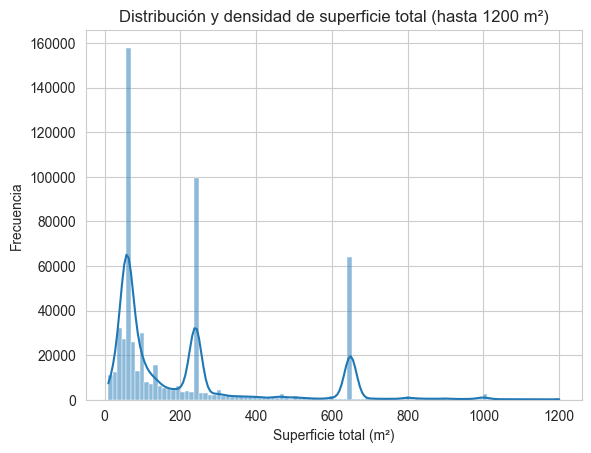

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data_arg[data_arg['surface_total'] <= 1200]['surface_total'], kde=True, bins=100)
plt.title("Distribución y densidad de superficie total (hasta 1200 m²)")
plt.xlabel("Superficie total (m²)")
plt.ylabel("Frecuencia")
plt.show()


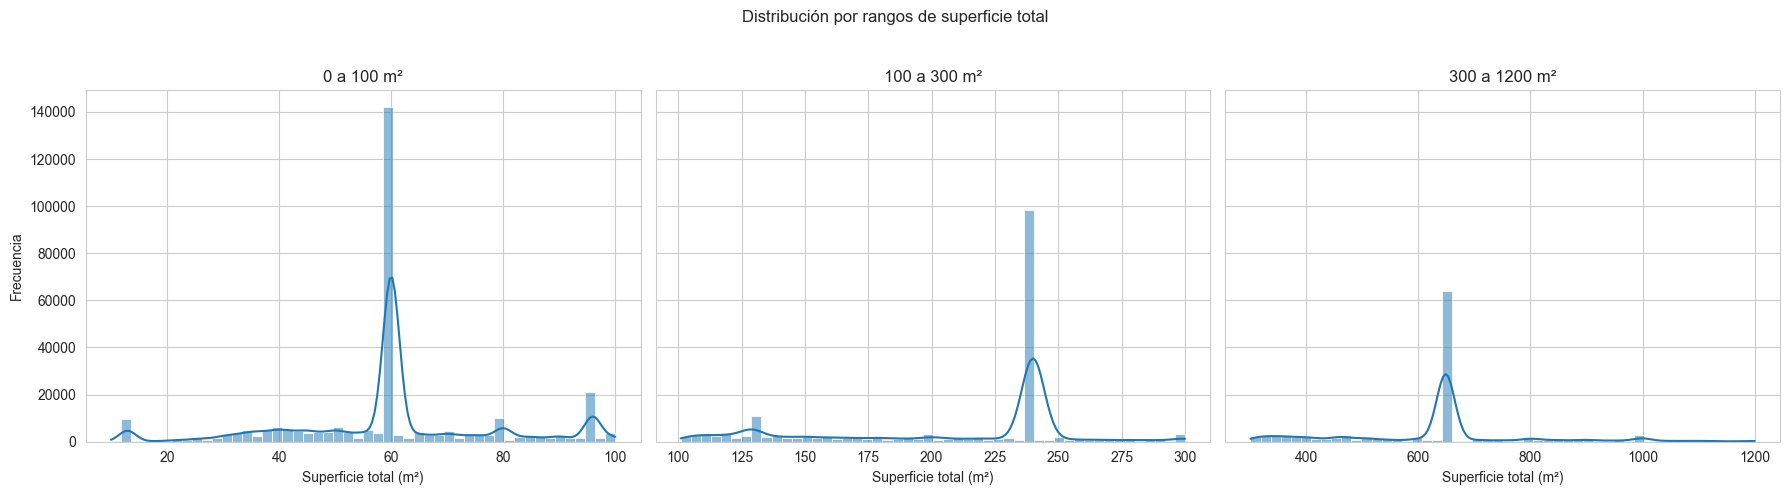

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Rango 0 a 100 m²
sns.histplot(data_arg[(data_arg['surface_total'] >= 0) & (data_arg['surface_total'] <= 100)]['surface_total'],
             kde=True, bins=50, ax=axes[0])
axes[0].set_title("0 a 100 m²")
axes[0].set_xlabel("Superficie total (m²)")
axes[0].set_ylabel("Frecuencia")

# Rango 100 a 300 m²
sns.histplot(data_arg[(data_arg['surface_total'] > 100) & (data_arg['surface_total'] <= 300)]['surface_total'],
             kde=True, bins=50, ax=axes[1])
axes[1].set_title("100 a 300 m²")
axes[1].set_xlabel("Superficie total (m²)")

# Rango 300 a 1200 m²
sns.histplot(data_arg[(data_arg['surface_total'] > 300) & (data_arg['surface_total'] <= 1200)]['surface_total'],
             kde=True, bins=50, ax=axes[2])
axes[2].set_title("300 a 1200 m²")
axes[2].set_xlabel("Superficie total (m²)")

plt.suptitle("Distribución por rangos de superficie total")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Insight:

3 picos muy marcados en 60, 250, 650 respectivamente, es sospechoso que haya tanta frecuencia de propiedades en una superficie exacta, por lo que puede ser por un redondero manual, default del sistema

In [49]:
data_arg['surface_total'].value_counts().loc[58:62]


surface_total
58.0     1718
49.0     1669
72.0     1648
130.0    1626
62.0     1624
Name: count, dtype: int64

## Correlaciones y dependencia

¿El precio aumenta con más habitaciones, baños, dormitorios?